<a href="https://colab.research.google.com/github/zahrakhanjani128/COVID-19-Literature-Clustering-Review/blob/main/version1_covid_19_literature_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A review on COVID-19 Literature Clustering
```
  {Khanjani, Zahra},
  The instructor= {Professor Philip Bogden}
    title = {A review on COVID-19 Literature Clustering. Data 602 final project},
    year = {2020},
    month = {May},
    location = {University of Maryland Baltimore County (UMBC), Baltimore, MD, USA},
    

```

# The Primary reference:
```
@inproceedings{COVID-19 Literature Clustering,
    author = {Eren, E. Maksim. Solovyev, Nick. Nicholas, Charles. Raff, Edward},
    title = {COVID-19 Literature Clustering},
    year = {2020},
    month = {April},
    location = {University of Maryland Baltimore County (UMBC), Baltimore, MD, USA},
    note={Malware Research Group},
    url = {\url{https://www.kaggle.com/maksimeren/covid-19-literature-clustering}},
    howpublished = {TBA}
}
```

# Goal



The ultimate goal of this research is to make doing COVID-19 researches easier for the health professionals. Clustering methods are used to keep similar research articles together which may simplify researching on COVID-19 (Eren et al, 2020). Therefore, this research's aim is clustering literature about COVID-19, then finding related keywords for each cluster. 
<br>
<br>

# The Datasets

>The White House and a coalition of leading research groups have provided the global research community with the COVID-19 Open Research Dataset (CORD-19) which is a resource of over 51,000 scholarly articles (Eren et al, 2020). It is also the main dataset to be used in the given research.
>#### Cite: [COVID-19 Open Research Dataset Challenge (CORD-19) | Kaggle](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge) 
> 

<br>

## Importing the necessary libraries:

In [ ]:
import numpy as np # linear algebra for using Numpy advantages 
import pandas as pd # For reading the CSV file, data processing and other pandas advatages

import matplotlib.pyplot as plt #For the visualization
plt.style.use('ggplot') #To get the ability to set “styles” on the plots 


## Loading the data from Kaggle 
Additionally, there is an access to all articles in JSON files. (Eren et al, 2020) read all JSON files including the related articles and loaded them into a data frame called df_covid. In the time of this research, there were 85371 articles in JSON files, so the df_covid had to have 85371 rows. Working with such a huge data frame, makes the project slow and needs more space on Colab or Drive. Due to these limitations, 10000 rows of the main df_covid were chosen as a new df_covid data frame by this research. The data set related to the new data frame is imported here to be used for literature clustering:

To use the data, my Google drive is mounted with Colab to have an access to the Google Drive files

In [ ]:
#PLEASE RUN THIS CELL FOR HAVING ACCESS TO THE DATA SET
url = "https://drive.google.com/uc?export=download&id=1--awfaKq5XEdbnT6KHpVUKZcTm7HUDBc"

df_covid = pd.read_excel(url)


In [ ]:
df_covid

,paper_id,doi,abstract,body_text,authors,title,journal,abstract_summary,abstract_word_count,body_word_count,body_unique_words
0,14572a7a9b3e92b960d92d9755979eb94c448bb5,10.3168/jds.s0022-0302(05)72740-5,The objective of this study was to evaluate th...,The periparturient period is an extremely impo...,"Franklin, S.T.. Newman, M.C.. Newman, K.E.....",Immune Parameters of Dry Cows Fed Mannan<br>O...,Journal of Dairy Science,The objective of this study was to evaluate t...,281,5783,1383
1,bb790e8366da63c4f5e2d64fa7bbd5673b93063c,10.1016/0092-8674(87)90212-1,NaN,Transcription or RNA Processing of Vaccinia Vi...,"Schwer, Beate. Visca, Paolo. Vos, Jan C.. <...",Discontinuous transcription or RNA<br>process...,Cell,Not provided.,0,4020,1110
2,7951a3ab59f6981023756dfce00760c1b29f58a4,10.1016/j.vetmic.2017.02.007,NaN,"Zoonosis is derived from the Greek words ""zoon...","Neo, Jacqueline Pei Shan. Tan, Boon Huan",The use of animals as a surveillance tool for...,Veterinary Microbiology,Not provided.,0,5138,1914
3,0cc1af1eb5f4d82bd01e25df342a5678c0588e98,10.1016/j.eimce.2018.05.018,Ribavirin is a molecule with antiviral activit...,Ribavirin is a molecule which was synthesised ...,"Ramírez-Olivencia, German. Estébanez,<br>Mir...",Use of ribavirin in viruses other than<br>hep...,Enfermedades infecciosas y microbiologia clini...,Ribavirin is a molecule with antiviral<br>act...,181,3166,1150
4,cd92f91038067e7a10aa27d676ce696e1e4d67ce,10.3892/etm.2016.3698,Mesenchymal stem cells have been widely studie...,Osteonecrosis of the femoral head (ONFH) is a ...,"Zhu, Zhen-Hong. Song, Wen-Qi. Zhang,<br>Cha...",Dimethyloxaloylglycine increases bone<br>repa...,Exp Ther Med,Mesenchymal stem cells have been widely<br>st...,246,3711,1298
...,...,...,...,...,...,...,...,...,...,...,...
9995,7b0bf82fab65c61cf4cf8530eb2c9fad3b4d2d4c,10.1046/j.1365-2656.1999.00360.x,1. We present data on the temporal dynamics of...,The temporal dynamics of viral pathogens depen...,"Packer, C.. Altizer, S.. Appel, M.. Brown,...",Viruses of the Serengeti: patterns of<br>infe...,J Anim Ecol,1. We present data on the temporal dynamics o...,237,6154,1625
9996,3bf0902346541d9c58458ab14fc97d2f95e2f63d,10.1186/1477-7525-8-66,Background: The current study explored the pre...,"Coping refers to the ""thoughts and behaviors t...","Zong, Ji-Gang. Cao, Xiao-Yan. Cao, Yuan. S...",Coping flexibility in college students with<b...,Health Qual Life Outcomes,Background: The current study explored the<br...,251,2839,938
9997,adbb0a486cf43c474df8b8b86fa6eacd422b171c,10.1186/1743-422x-10-294,Although primary isolation of HMPV has been ac...,Human metapneumovirus (HMPV) is a new member o...,"Loo, Liat Hui. Jumat, Muhammad Raihan. Fu, ...",Evidence for the interaction of the human<br>...,Virol J,Although primary isolation of HMPV has been<b...,331,4458,1249
9998,266001fc1cb47ad54d5b645c3b4c617813c43e3c,10.1101/2020.04.26.20080242,"At this moment, the world leaves under the SAR...",Since the first described cases of severe acut...,Carlos M Chiesa-Estomba. Jerome R Lechien. <...,Systematic review of international<br>guideli...,NaN,"At this moment, the world leaves under the<br...",111,3840,1169


## Handle Possible Duplicates
There should be duplicated articles in the data frame since some articles are submitted in different journals There should be duplicated articles in the data frame since some articles are submitted in different journals. Therefore, (Eren et al, 2020) checked the number of duplicates in the abstracts with the code below:



In [ ]:
df_covid.drop_duplicates(['abstract', 'body_text'], inplace=True)
df_covid['abstract'].describe(include='all')

count           7072
unique          7059
top       PLOS ONE |
freq               3
Name: abstract, dtype: object

As you can see, there are 7072 abstracts for articles from which 7059 abstracts are unique and 13 of them are duplicates. (Eren et al, 2020) aslo checked the duplicates in the bodies of the articles: 

In [ ]:
df_covid['body_text'].describe(include='all')

count                                                  9997
unique                                                 9997
top       Interferon induced transmembrane proteins (IFI...
freq                                                      1
Name: body_text, dtype: object

It looks like there is no duplicate in terms of the text bodies. There are 2925 articles without Abstracts.

## a Look at the Data:

In [ ]:
df_covid.head()

,paper_id,doi,abstract,body_text,authors,title,journal,abstract_summary,abstract_word_count,body_word_count,body_unique_words
0,14572a7a9b3e92b960d92d9755979eb94c448bb5,10.3168/jds.s0022-0302(05)72740-5,The objective of this study was to evaluate th...,The periparturient period is an extremely impo...,"Franklin, S.T.. Newman, M.C.. Newman, K.E.....",Immune Parameters of Dry Cows Fed Mannan<br>O...,Journal of Dairy Science,The objective of this study was to evaluate t...,281,5783,1383
1,bb790e8366da63c4f5e2d64fa7bbd5673b93063c,10.1016/0092-8674(87)90212-1,NaN,Transcription or RNA Processing of Vaccinia Vi...,"Schwer, Beate. Visca, Paolo. Vos, Jan C.. <...",Discontinuous transcription or RNA<br>process...,Cell,Not provided.,0,4020,1110
2,7951a3ab59f6981023756dfce00760c1b29f58a4,10.1016/j.vetmic.2017.02.007,NaN,"Zoonosis is derived from the Greek words ""zoon...","Neo, Jacqueline Pei Shan. Tan, Boon Huan",The use of animals as a surveillance tool for...,Veterinary Microbiology,Not provided.,0,5138,1914
3,0cc1af1eb5f4d82bd01e25df342a5678c0588e98,10.1016/j.eimce.2018.05.018,Ribavirin is a molecule with antiviral activit...,Ribavirin is a molecule which was synthesised ...,"Ramírez-Olivencia, German. Estébanez,<br>Mir...",Use of ribavirin in viruses other than<br>hep...,Enfermedades infecciosas y microbiologia clini...,Ribavirin is a molecule with antiviral<br>act...,181,3166,1150
4,cd92f91038067e7a10aa27d676ce696e1e4d67ce,10.3892/etm.2016.3698,Mesenchymal stem cells have been widely studie...,Osteonecrosis of the femoral head (ONFH) is a ...,"Zhu, Zhen-Hong. Song, Wen-Qi. Zhang,<br>Cha...",Dimethyloxaloylglycine increases bone<br>repa...,Exp Ther Med,Mesenchymal stem cells have been widely<br>st...,246,3711,1298


In the majority of this notebook we will be working with **body_text** <br>
Links to the papers will be generated using **doi** (Eren et al, 2020).

In [ ]:
df_covid.describe()

,abstract_word_count,body_word_count,body_unique_words
count,9999.000000,9999.000000,9999.000000
mean,151.856286,4365.147615,1341.036104
std,157.781730,6376.648651,1134.961420
min,0.000000,1.000000,1.000000
25%,0.000000,2052.500000,805.000000
50%,151.000000,3417.000000,1176.000000
75%,229.000000,5214.000000,1617.000000
max,2895.000000,241076.000000,38298.000000


# Data Pre-processing

Now that we have our dataset loaded, we need to clean-up the text to improve any clustering or classification efforts. First, let's drop Null vales:

In [ ]:
df_covid.dropna(inplace=True)
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6166 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   paper_id             6166 non-null   object
 1   doi                  6166 non-null   object
 2   abstract             6166 non-null   object
 3   body_text            6166 non-null   object
 4   authors              6166 non-null   object
 5   title                6166 non-null   object
 6   journal              6166 non-null   object
 7   abstract_summary     6166 non-null   object
 8   abstract_word_count  6166 non-null   int64 
 9   body_word_count      6166 non-null   int64 
 10  body_unique_words    6166 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 578.1+ KB


## Handling multiple languages
Then, the language of articles are determined since some of them are not in English and should be deleted (Eren et al, 2020).
In text mining one of the important steps is language identification. It is about which natural language given content is in. The “langdetect” is used to identify the language of texts, and it is a really powerful tool since we tried in the codes below with two very similar languages (Farsi and Arabic have almost the same fonts), and it worked well:

In [ ]:
pip install langdetect

     |████████████████████████████████| 983kB 2.6MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=77cdc96100cdc217242d9660c32fb3fae89a0e205ce57c30a9a517571762ba4b
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [ ]:
from langdetect import detect
detect("و علیم السلام.")


'ar'

In [ ]:
detect("سلام به همه.")


'fa'

In [ ]:
detect("hello everyone I hope you are good")

'en'

Then TQDM that is a progress bar library, and supports nested loops and Jupyter/IPython notebooks, is used. According to (Eren et al, 2020),  Detector Factory Class is also used. This class manages an initialization and construction of the language detector. Before using language detection library, it is needed to load profiles with DetectorFactory and set initialization parameters.
When the language detection, it is needed to construct Detector instance via DetectorFactory.create().

In [ ]:
#all codes of this cell are from (Eren et al, 2020):
from tqdm import tqdm
from langdetect import detect
from langdetect import DetectorFactory
df = df_covid
# set seed (Eren et al, 2020)
DetectorFactory.seed = 0

# language is determined to hold all language labels
languages = []

# go through each text (Eren et al, 2020)
for ii in tqdm(range(0,len(df))):
    # split by space into list, it takes the first x index, and joins it with space (Eren et al, 2020)
    # so text is defined as a ndarray to keepm the words of the texts into a list
    text = df.iloc[ii]['body_text'].split(" ")
    #it set the lang as a type of language (for example en)
    #then in the for loop, the lang is being updated
    lang = "en"
    try:
      #with these codes the author wants the system to detect the language with less than 50 words. 
        if len(text) > 50:
            lang = detect(" ".join(text[:50]))
        elif len(text) > 0:
            lang = detect(" ".join(text[:len(text)]))
    # ught... beginning of the document was not in a good format (Eren et al, 2020)
    except Exception as e:
        all_words = set(text)
        try:
            lang = detect(" ".join(all_words))
        # what!! :( let's see if we can find any text in abstract... (Eren et al, 2020)
        except Exception as e:
            
            try:
                # let's try to label it through the abstract then (Eren et al, 2020)
                lang = detect(df.iloc[ii]['abstract_summary'])
            except Exception as e:
                lang = "unknown"
                pass
    
    # get the language (Eren et al, 2020)   
    languages.append(lang)

100%|██████████| 6166/6166 [00:33<00:00, 184.69it/s]


In [ ]:
#as you can see, the list containing languages has 6166 elements which means 6166 articles now have determined languages 
print(len(languages))

6166


In [ ]:
#cite (Eren et al, 2020):
#Here (Eren et al, 2020) defined a dictionary to count and keep the number of articles related to each detected language 
from pprint import pprint

languages_dict = {}
for lang in set(languages):
    languages_dict[lang] = languages.count(lang)
    
print("Total: {}\n".format(len(languages)))
pprint(languages_dict)

Total: 6166

{'cy': 1,
 'de': 7,
 'en': 6061,
 'es': 35,
 'fr': 54,
 'it': 2,
 'nl': 3,
 'pl': 1,
 'pt': 2}


Lets take a look at the language distribution in the dataset

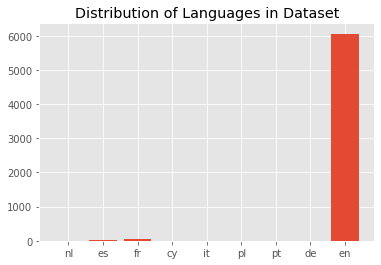

In [ ]:
#cite (Eren et al, 2020):
df['language'] = languages
plt.bar(range(len(languages_dict)), list(languages_dict.values()), align='center')
plt.xticks(range(len(languages_dict)), list(languages_dict.keys()))
plt.title("Distribution of Languages in Dataset")
plt.show()


Then, all non English articles should be deleted, so they do not cause misleading. Therefore, another data frame is defined to keep all rows related to the in English articles. This data frame is the main data frame from now.

In [ ]:
#cite (Eren et al, 2020):
df = df[df['language'] == 'en'] 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6061 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   paper_id             6061 non-null   object
 1   doi                  6061 non-null   object
 2   abstract             6061 non-null   object
 3   body_text            6061 non-null   object
 4   authors              6061 non-null   object
 5   title                6061 non-null   object
 6   journal              6061 non-null   object
 7   abstract_summary     6061 non-null   object
 8   abstract_word_count  6061 non-null   int64 
 9   body_word_count      6061 non-null   int64 
 10  body_unique_words    6061 non-null   int64 
 11  language             6061 non-null   object
dtypes: int64(3), object(9)
memory usage: 615.6+ KB


In [ ]:
#PLEASE IGNORE THIS CELL
#df.to_excel("df.xlsx")
#df = pd.read_excel('df.xlsx')
#df

In [ ]:
# Download the spacy bio parser
%%time
from IPython.utils import io
with io.capture_output() as captured:
    !pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_core_sci_lg-0.2.4.tar.gz

CPU times: user 775 ms, sys: 1.92 s, total: 2.69 s
Wall time: 1min 48s


In [ ]:
#NLP 
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_sci_lg  # model downloaded in previous step

### Stopwords
 Removing stop-words is a useful technique to preprocess texts when we are working with raw or normalized term frequencies and not tf-idfs, which down weight frequently occurring words (Raschka and Mirjalili, 2, 3rd edition). Stop words are the words that exist in all kind of texts, so they bear a little fruitful information to be used to their cluster recognition (Raschka and Mirjalili, 2, 3rd edition). For example, am, is, and, has are stop words. 

In (Raschka and Mirjalili, 2, 3rd edition) the author uses “nltk” stop words with the code below:

In [ ]:
pip install nltk

In [ ]:
#cite: (Raschka and Mirjalili, 2, 3rd edition)
import nltk
nltk.download('stopwords')
#After we download the stop-words set, we can load and apply the English stop-word set as follows:
from nltk.corpus import stopwords
stop = stopwords.words('english')
print(len(stop))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
179


In [ ]:
#cite: (Eren et al, 2020)
import string

punctuations = string.punctuation
stopwords = list(STOP_WORDS)
stopwords[:14]

['twenty',
 'why',
 'quite',
 'thereupon',
 'anywhere',
 '’d',
 'within',
 'forty',
 'neither',
 'even',
 'everyone',
 'hers',
 'take',
 '’ll']

In [ ]:
print(len(stopwords))

326


As we checked, the list of stop words used by (Eren et al, 2020) includes 350 stop words, but the nltk stop words list which used by … contains 179 stop words. Therefore, the list of (Eren et al, 2020) is better to be used since is better able to delete noises.

According to Wolffram (2020), there are some stop words which are specially for articles. The list of stop words which is used in the previous cell is common words in every-day English. However, there are some stop words which exist in articles such as: doi, www, http and fig.The code below refers to these stop words, and each stop word which does not exist in common stop words is added to the list.

In [ ]:
#cite: (Eren et al, 2020)
custom_stop_words = [
    'doi', 'preprint', 'copyright', 'peer', 'reviewed', 'org', 'https', 'et', 'al', 'author', 'figure', 
    'rights', 'reserved', 'permission', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.', 
    'al.', 'Elsevier', 'PMC', 'CZI', 'www'
]

for w in custom_stop_words:
    if w not in stopwords:
        stopwords.append(w)

### Processor Function 
In the cell below, Eren et al (2020) uses en_core_sci_lg which is a model specially for processing biomedical, scientific or clinical texts. This model is used to convert text to lower case, remove punctuation, and find and remove stopwords.

In [ ]:
#cite: (Eren et al, 2020)
# Parser
parser = en_core_sci_lg.load(disable=["tagger", "ner"])
parser.max_length = 7000000

def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    mytokens = " ".join([i for i in mytokens])
    return mytokens

In the codes below, another column is added to keep processed body texts and it should be utilized instead of the body text column in the other steps of the NLP. 



In [ ]:
%%time
from tqdm import tqdm
#cite: (Eren et al, 2020)
tqdm.pandas()
df["processed_text"] = df["body_text"].progress_apply(spacy_tokenizer)

100%|██████████| 6061/6061 [30:41<00:00,  3.29it/s]

CPU times: user 30min 6s, sys: 36.3 s, total: 30min 43s
Wall time: 30min 41s



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
#PLEASE IGNORE THIS CELL
#df.to_excel("df2.xlsx")
#df = pd.read_excel('drive/My Drive/project/df2.xlsx')
#df


### How many words and unique words do the articles have in average?
According to the plots above, the mean of the number of words is 4297 and for unique words is 1354. Almost 98% of the whole articles have less than 20000 words, so those that have more than 20000 could be outliers (Eren et al, 2020).

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


count     6061.000000
mean      4297.351427
std       3312.853277
min         12.000000
25%       2608.000000
50%       3708.000000
75%       5348.000000
max      94779.000000
Name: body_word_count, dtype: float64

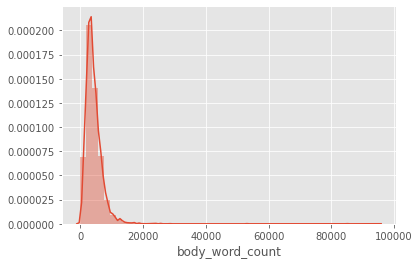

In [ ]:
#cite: (Eren et al, 2020)
sns.distplot(df['body_word_count'])
df['body_word_count'].describe()

count     6061.000000
mean      1354.934334
std        684.929376
min          9.000000
25%        957.000000
50%       1246.000000
75%       1643.000000
max      14516.000000
Name: body_unique_words, dtype: float64

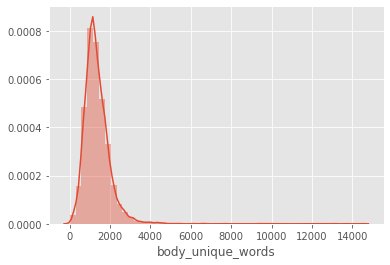

In [ ]:
#cite: (Eren et al, 2020)
sns.distplot(df['body_unique_words'])
df['body_unique_words'].describe()

# Vectorization
Vividly, it is needed to convert categorical data, such as text or words, into a numerical form before we can pass it on to a machine learning algorithm (Raschka and Mirjalili, 2, 3rd edition). There are different methods to do this. For example, (Raschka and Mirjalili, 2, 3rd edition) introduces a method with the name “Bag-of-words” to convert texts to numerical feature vectors. Bag-of-words includes two steps. Firstly, a vocabulary of unique tokens—for example, words—from the entire set of documents is created. Secondly, a feature vector from each document that contains the counts of how often each word occurs in the particular document is constructed (Raschka and Mirjalili, 2, 3rd edition). Therefore, for each article as a row, there are a lot of zeros since each article does not have a lot of unique words. This situation causes curse of dimensionality which should be addressed. Bag-of-words can be run using CountVectorizer. In the case of the given research, it should be found that how important each word is to the instance out of the literature as a whole because of the purpose of this research, and it should be done by using tf-idf (Eren et al, 2020). 

TfidfVectorizer is used to Convert a collection of raw documents to a matrix of TF-IDF features. In the codes below, vectorizer function is defined and it is fitted on the processed text column which was gained from the text bodies of the articles. Vectorizer is a combinition of CountVectorizer and TfidfTransformer, therefore (Eren et al, 2020) also uses bag-of-words method. As it is expected, X which is a sparse matrix (because of containing a lot of 0s) has a lot of columns as features (4096)

 The maximum number of features is restricted. Only the top 2 ** 12 = 4096 features are used, eseentially  for filtering noise and avoiding long run times (Eren et al, 2020).

In [ ]:
#cite: (Eren et al, 2020)
from sklearn.feature_extraction.text import TfidfVectorizer
def vectorize(text, maxx_features):
    
    vectorizer = TfidfVectorizer(max_features=maxx_features)
    X = vectorizer.fit_transform(text)
    return X

In [ ]:
#cite: (Eren et al, 2020)
text = df['processed_text'].values
X = vectorize(text, 2 ** 12)
X.shape

(6061, 4096)

In [ ]:
X
#X[0]

<6061x4096 sparse matrix of type '<class 'numpy.float64'>'
	with 3360379 stored elements in Compressed Sparse Row format>

In [ ]:
print(X)

  (0, 809)	0.003946332355579019
  (0, 2829)	0.003404336197514766
  (0, 2627)	0.0025896774017810267
  (0, 2277)	0.0029465003063070066
  (0, 3189)	0.0031660261111268705
  (0, 199)	0.0037073726796716475
  (0, 965)	0.002607870246548154
  (0, 2783)	0.004038785890009024
  (0, 1610)	0.010751040960926038
  (0, 1067)	0.00208191816705326
  (0, 3698)	0.002863213052478788
  (0, 2589)	0.005253629500252826
  (0, 1336)	0.004015469764333077
  (0, 273)	0.0030111432860262244
  (0, 1453)	0.0023454021224829143
  (0, 801)	0.0028705799967099228
  (0, 897)	0.00373727512216699
  (0, 288)	0.00443850005972162
  (0, 2729)	0.0042593211814697714
  (0, 1946)	0.014440320741609017
  (0, 415)	0.0028658873864578147
  (0, 802)	0.004480345350358658
  (0, 3070)	0.01642508004714895
  (0, 2288)	0.022847927307367517
  (0, 3386)	0.004398587448474508
  :	:
  (6060, 2933)	0.07120979029616721
  (6060, 967)	0.02955994865017871
  (6060, 3532)	0.023258006095731244
  (6060, 2655)	0.015142891681875058
  (6060, 1520)	0.017381479613551

In [ ]:
import scipy.sparse
scipy.sparse.save_npz('sparse_matrix.npz' ,X)

In [ ]:
 #import scipy.sparse
#X = scipy.sparse.load_npz('sparse_matrix.npz')

# Principle Component Analysis (PCA)

Principle Component Analysis (PCA) is used to reduce the number of dimensions while still keeping 95% variance (defined by n_components). PCA removes some noise/outliers from the data, and makes the clustering problem easier for k-means (Eren et al, 2020). Although k-means needs the reduced feature matrix, t-SNE does not need it (Eren et al, 2020). It can work on the original X data set well.

In [ ]:
#cite: (Eren et al, 2020)
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)
X_reduced= pca.fit_transform(X.toarray())
X_reduced.shape

(6061, 1929)

In [ ]:
print(pca.explained_variance_ratio_)

[2.59483191e-02 1.56330670e-02 1.46463762e-02 ... 7.02206072e-05
 7.01056437e-05 6.99571404e-05]


In [ ]:
#cite: https://stackoverflow.com/questions/31909945/obtain-eigen-values-and-vectors-from-sklearn-pca/31941631
eigen_vals = pca.explained_variance_
print(eigen_vals)
print(len(eigen_vals))

[2.41046640e-02 1.45223213e-02 1.36057359e-02 ... 6.52313600e-05
 6.51245648e-05 6.49866128e-05]
1929


According to Raschka and Mirjalili, "using the NumPy cumsum function, we can then calculate the cumulative sum of explained variances, which we will then plot via Matplotlib's step function" (Raschka and Mirjalili, 2, 3rd edition): 

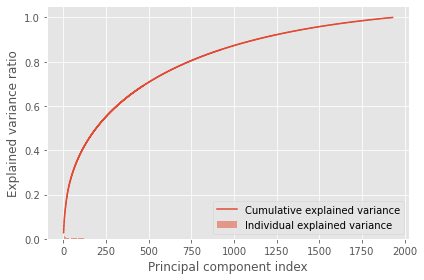

In [ ]:
# cite: (Raschka and Mirjalili, 2, 3rd edition)
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in
           sorted(eigen_vals, reverse=True)]         
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(range(1,1930), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1,1930), cum_var_exp, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

According to the plot above, to keep 0.95% explained variance ratio almost 1500 principal components are enough! However, (Eren et al, 2020) has used all 1930 principal components because PCA of SKlearn has given this number of principal components to maintain 0.95% explained variance ratio! Comparing two methods to implement PCA shows that SKlearn PCA gives more principal components than really needed ones.

In [ ]:
print(X_reduced)

[[ 0.00202304 -0.05685137 -0.10133652 ...  0.00129609  0.00122724
  -0.00172533]
 [ 0.11987481  0.05436477 -0.02216537 ... -0.01179398 -0.00066165
  -0.00763142]
 [-0.05485567  0.04650948 -0.09761645 ... -0.01661708  0.0133783
  -0.02603494]
 ...
 [ 0.09900753 -0.05608552 -0.0481466  ...  0.00572602 -0.00461651
  -0.00596645]
 [-0.26744688  0.05407407  0.01724143 ...  0.01039589 -0.01049232
  -0.00648972]
 [ 0.08566855 -0.10227462 -0.01936694 ...  0.0174765  -0.00256707
  -0.02631308]]


[source](https://en.wikipedia.org/wiki/K-means_clustering)

##K-means
To use k-means as the main clustering algorithm, we need to identify the optimized k since k is a hyperparameter of k-means algorithm.

### The optimized k value

To find the optimized k value for k-means elbow method is used. It calculates distortion at different k values, and "distortion computes the sum of squared distances from each point to its assigned center. When distortion is plotted against k there will be a k value after which decreases in distortion are minimal. This is the desired number of clusters" (Eren et al, 2020).

In [ ]:
#cite: (Eren et al, 2020)
from sklearn.cluster import KMeans

In [ ]:
#cite: (Eren et al, 2020)
from sklearn import metrics
from scipy.spatial.distance import cdist

# run kmeans with many different k
distortions = []
K = range(2, 50)
for k in K:
    k_means = KMeans(n_clusters=k, random_state=42).fit(X_reduced)
    k_means.fit(X_reduced)
    distortions.append(sum(np.min(cdist(X_reduced, k_means.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    #print('Found distortion for {} clusters'.format(k))

In [ ]:
#cite: (Eren et al, 2020)
X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# Plot the elbow
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

According to the plot above, it seems that distoration decrease a little after k=25. It shows that k between 18 and 25 can be an optimized k. To simplify further calculations k=20 is chosen (Eren et al, 2020).

on the PCA-processed feature vector (X_reduced) k-means algorithm with k = 20 is applied: 

In [ ]:
#cite: (Eren et al, 2020)

kmeans = KMeans(n_clusters=20, random_state=42)
y_pred = kmeans.fit_predict(X_reduced)
df['y'] = y_pred

# Topic Modeling on Each Cluster
Since K-means clustered the articles but did not label the topics we need to create a model to find the most significant words in each cluter. Therefore, the topic modeling finds the keywords of each cluster, so the clusters are more meaningful (Eren et al, 2020).

 In LDA which is used for topic modeling each document can be described by a distribution of topics and each topic can be described by a distribution of words (Eren et al, 2020)[.](https://towardsdatascience.com/light-on-math-machine-learning-intuitive-guide-to-latent-dirichlet-allocation-437c81220158)

 LDA is a generative probabilistic model that is supposed to find groups of words that exist frequently together in different documents. These frequently appearing words suggest the topics of each document (Raschka and Mirjalili, 2, 3rd edition). Given a bag-of-words matrix as input of LDA, LDA decomposes it into two new matrices: 1. A document-to-topic matrix 2. A word-to-topic matrix. According to LDA decomposition, if those two matrixes are multiplied together, the input (the bag-of-words matrix) can be reproduced with the lowest possible error (Raschka and Mirjalili, 2, 3rd edition).  The only downside of LDA is that the number of topics is a hyperparameter that has to be specified manually (Raschka and Mirjalili, 2, 3rd edition). In the given research, we determined the number of clusters using Elbow method and k-means. Therefore, the number of topics is 20 in the given research, and the downside of the LDA is handled.

The CountVectorizer is used to create the bag-of-words matrix as input to the LDA.
the LatentDirichletAllocation class implemented in scikit-learn to decompose the given dataset and categorize it into different topics. Vividly, in the given research, the LDA should be restricted to 20 topics.

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

[source](https://towardsdatascience.com/latent-dirichlet-allocation-15800c852699)

For each of the cluster labels, one topic should be defined. The cell below is used for creating the topics. The vectorizers list is defined to keep bag-of-words. In addition, although the data is preprocessd and all stop words are deleted, scikit-learn's built-in English stop-word library via stop_words='english' is used. 
The maximum document frequency of words is set to 90 percent (max_df=.9) 

In [ ]:
#cite: (Eren et al, 2020)
vectorizers = []
    
for ii in range(0, 20):
    # Creating a vectorizer
    vectorizers.append(CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}'))

In [ ]:
vectorizers[2]

In [ ]:
print(len(vectorizers))

In the previous cells a sparse matrix (X) was defined using TfidfVectorizer. Then, feature reduction performed on X matrix using the PCA, and X_reduced was created. Elbow method performed on X_reduced sparse matrix to find the best k for k-means algorithm. The optimized k was k=20. The k-means was applied on the X_reduced sparse matrix, so 20 clusters were found, and ‘y’ column was added to the data frame containing all of the processed texts. 
Then, (Eren et al, 2020) used CountVectorizer to create 20 vectorizers. After that, each vectorizer is fitted for each cluster separately. Therefore, each element of vectorized_data list is a sparse matrix refers to one the samples of one cluster. 


In [ ]:
vectorized_data = []

for current_cluster, cvec in enumerate(vectorizers):
    try:
        vectorized_data.append(cvec.fit_transform(df.loc[df['y'] == current_cluster, 'processed_text']))
    except Exception as e:
        print("Not enough instances in cluster: " + str(current_cluster))
        vectorized_data.append(None)

In [ ]:
len(vectorized_data)

The codes below show that each element of the vectorized_data list is a sparse matrix. For example, the first element in the vectorized_data is a sparse matrix with 92 rows and 2315 columns. 

In [ ]:
vectorized_data[0]

In [ ]:
print(vectorized_data[0])


The code below show that the first element of the vectorized_data list is a sparse matrix which the third element of it (like all of its elements) is another sparse matrix. vectorized_data[i] is a sparse matrix that has some spars matrixes as its elements.

In [ ]:
print(vectorized_data[0][3])

It may help to know how many members each cluster has? It is visualized in the bar plot below.

In [ ]:

l = df['y'].values
sum = []
indices = []
i=0
for i in range(0, 20):
  sum.append(0)
  indices.append(i)

for i in l :
  if l[i] == 0:
    sum[0] += 1
  elif l[i] == 1:
    sum[1] += 1
  elif l[i] == 2:
    sum[2] += 1
  elif l[i] == 3:
    sum[3] += 1
  elif l[i] == 4:
    sum[4] += 1
  elif l[i] == 5:
    sum[5] += 1
  elif l[i] == 6:
    sum[6] += 1
  elif l[i] == 7:
    sum[7] += 1
  elif l[i] == 8:
    sum[8] += 1
  elif l[i] == 9:
    sum[9] += 1
  elif l[i] == 10:
    sum[10] += 1
  elif l[i] == 11:
    sum[11] += 1
  elif l[i] == 12:
    sum[12] += 1
  elif l[i] == 13:
    sum[13] += 1
  elif l[i] == 14:
    sum[14] += 1
  elif l[i] == 15:
    sum[15] += 1
  elif l[i] == 16:
    sum[16] += 1
  elif l[i] == 17:
    sum[17] += 1
  elif l[i] == 18:
    sum[18] += 1
  elif l[i] == 19:
    sum[19] += 1
  elif l[i] == 20:
    sum[20] += 1
  i = i+1


plt.bar(indices, sum, 0.5)


print(sum)


The code below is regarding LDA model structure. The learning_method in the Kaggle notebook (Eren et al, 2020) is learning_method='online'. However, according to Raschka and Mirjalili (2&3rd), By setting learning_method='batch',  the lda estimator is allowed do its estimation based on all available training data (the bag-of-words matrix) in one iteration. Although learning_method='batch' makes the model slower than the alternative 'online' learning method but can give more accurate results because learning_method='online' is analogous to online or mini-batch (Raschka and Mirjalili, 2, 3rd edition).


In [ ]:
#cite: (Eren et al, 2020)
# number of topics per cluster
NUM_TOPICS_PER_CLUSTER = 20

lda_models = []
for ii in range(0, 20):
    # Latent Dirichlet Allocation Model
    lda = LatentDirichletAllocation(n_components=NUM_TOPICS_PER_CLUSTER, max_iter=10, learning_method='batch',verbose=False, random_state=42)
    lda_models.append(lda)
    
lda_models[0]

A correspoding LDA model for each cluster is created  in the previous step. Now, all the LDA models should be fitted on their respective cluster using fit_transform (Eren et al, 2020).
 

In [ ]:
#cite: (Eren et al, 2020)
clusters_lda_data = []

for current_cluster, lda in enumerate(lda_models):
    # print("Current Cluster: " + str(current_cluster))
    
    if vectorized_data[current_cluster] != None:
        clusters_lda_data.append((lda.fit_transform(vectorized_data[current_cluster])))

In [ ]:
print(len(clusters_lda_data))

In [ ]:
vectorized_data[0]

In [ ]:
len(clusters_lda_data[0])

In [ ]:
vectorized_data[2]

In [ ]:
len(clusters_lda_data[2])

Obviously, and as the codes above show the number of the elements of each element of clusters_lda_data is equal to the number of rows of the corresponding sparse matrix in the vectorized_data list.

Extracts the keywords from each cluster:

In [ ]:
#cite: (Eren et al, 2020)
# The structure of functions for printing keywords for each topic is defined
def selected_topics(model, vectorizer, top_n=3):
    current_words = []
    keywords = []
    
    for idx, topic in enumerate(model.components_):
        words = [(vectorizer.get_feature_names()[i], topic[i]) for i in topic.argsort()[:-top_n - 1:-1]]
        for word in words:
            if word[0] not in current_words:
                keywords.append(word)
                current_words.append(word[0])
                
    keywords.sort(key = lambda x: x[1])  
    keywords.reverse()
    return_values = []
    for ii in keywords:
        return_values.append(ii[0])
    return return_values

Append list of keywords for a single cluster to 2D list of length NUM_TOPICS_PER_CLUSTER

In [ ]:
#cite: (Eren et al, 2020)
all_keywords = []
for current_vectorizer, lda in enumerate(lda_models):
    # print("Current Cluster: " + str(current_vectorizer))

    if vectorized_data[current_vectorizer] != None:
        all_keywords.append(selected_topics(lda, vectorizers[current_vectorizer]))

In [ ]:
#cite: (Eren et al, 2020)
all_keywords[0][:10]

In [ ]:
all_keywords[1]

In [ ]:
len(all_keywords[1])

In [ ]:
len(all_keywords[0])

In [ ]:
#cite: (Eren et al, 2020)
len(all_keywords)

Therefore, for each cluster some keywords are assigned. For example, based on the codes above, 46 keywords are recognized for the cluster 2 (index 1) and 41 keywords for the cluster 1 (index 0). Vividly, each group of keywords is each element of the all_keywords list, so the length of all_keywords list is 20-- the number of different clusters. 

# Model Evaluation
One way to evaluate clustering is using classification techniques (Eren et al, 2020). After running k-means, the data is labeled, and classification methods can be applied on the labeled data. If the k-means was able to cluster data properly, there should be the possibility to train a classifier to predict which cluster a given sample belongs to Eren et al, 2020). Therefore, to check how proper the clustering model is, a classification technique is used. 

In [ ]:
#cite: (Eren et al, 2020)
# function to print out classification model report
def classification_report(model_name, test, pred):
    from sklearn.metrics import precision_score, recall_score
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import f1_score
    
    print(model_name, ":\n")
    print("Accuracy Score: ", '{:,.3f}'.format(float(accuracy_score(test, pred)) * 100), "%")
    print("     Precision: ", '{:,.3f}'.format(float(precision_score(test, pred, average='macro')) * 100), "%")
    print("        Recall: ", '{:,.3f}'.format(float(recall_score(test, pred, average='macro')) * 100), "%")
    print("      F1 score: ", '{:,.3f}'.format(float(f1_score(test, pred, average='macro')) * 100), "%")

splitting data to training and testing data sets

In [ ]:
#cite: (Eren et al, 2020)
from sklearn.model_selection import train_test_split

# test set size of 20% of the data and the random seed 42 <3
X_train, X_test, y_train, y_test = train_test_split(X.toarray(),y_pred, test_size=0.2, random_state=42)

print("X_train size:", len(X_train))
print("X_test size:", len(X_test), "\n")

"**Precision** is ratio of True Positives to True Positives + False Positives. This is the accuracy of positive predictions<br>
**Recall** (also known as TPR) measures the ratio of True Positives to True Positives + False Negatives. It measures the ratio of positive instances that are correctly detected by the classifer.<br>
**F1 score**  is the harmonic average of the precision and recall. F1 score will only be high if both precision and recall are high" (Eren et al, 2020, cell:57)

#### Cite: [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow: Second Edition | Aurélien Geron](https://github.com/ageron/handson-ml2) 

Stochastic gradient descent (SGD) is an iterative method used to optimize an objective function (e.g. differentiable or subdifferentiable). Cite: https://en.wikipedia.org/wiki/Stochastic_gradient_descent
Since the SGD is a linear model can be applied via sklearn.linear_model. It run a linear classifier (SVM, logistic regression, a.o.) with SGD training. This estimator implements regularized linear models with stochastic gradient descent (SGD) learning: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule.


In [ ]:
#cite: (Eren et al, 2020)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import SGDClassifier

# SGD instance
sgd_clf = SGDClassifier(max_iter=10000, tol=1e-3, random_state=42, n_jobs=4)
# train SGD
sgd_clf.fit(X_train, y_train)

# cross validation predictions
sgd_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3, n_jobs=4)

# print out the classification report
classification_report("Stochastic Gradient Descent Report (Training Set)", y_train, sgd_pred)

To test for overfitting, let's see how the model generalizes over the test set

In [ ]:
#cite: (Eren et al, 2020)
# cross validation predictions
sgd_pred = cross_val_predict(sgd_clf, X_test, y_test, cv=3, n_jobs=4)

# print out the classification report
classification_report("Stochastic Gradient Descent Report (Training Set)", y_test, sgd_pred)

Therefore, the model does not suffer from overfitting

Now let's see how the model can generalize across the whole dataset.

In [ ]:
#cite: (Eren et al, 2020)
sgd_cv_score = cross_val_score(sgd_clf, X.toarray(), y_pred, cv=10)
print("Mean cv Score - SGD: {:,.3f}".format(float(sgd_cv_score.mean()) * 100), "%")

# Conclusion
In this project, an attempt was made to cluster published literature on COVID-19 and simplify medical professionals’ researching on COVID-19. “Instead of having to manually search for related work, every publication is connected to a larger topic cluster” (Eren et al, 2020). 
Because of lack of space and avoiding long runtimes 10000 samples were chosen from the whole 85371 data.  Preprocessing was performed on the 10000 data, and as the result 6061 samples remained in the data frame. For example, as a preprocessing step, the distribution of different languages was gained and plotted. Vividly, all articles which were not in English were dropped. It was needed to convert categorical data, such as text or words, into a numerical form before we could pass it on to a machine learning algorithm. Bag-of-words method and vectorization applied on the data frame to convert texts to sparse matrixes which are understandable by the algorithms. Therefore, for each article as a row, there are a lot of zeros since each article does not have a lot of unique words. This situation causes curse of dimensionality which were addressed by using PCA. In the case of the given research, it was important to find that how important each word is to the instance out of the literature as a whole because of the purpose of this research, and it should be done by using tf-idf. Vectorizer is a combinition of CountVectorizer and TfidfTransformer which was used for vectorization. The output of this step was a sparse matrix with 4096 columns (X). After applying PCA 1929 features remained. This size of features were able to cover 0.95% of the variance of the data (X_reduced). “The clustering of the data was done through k-means on a pre-processed, vectorized version of the literature’s body text” (Eren et al, 2020).
The LDA was performed on the data to identify the keywords for each cluster. “Both the clusters and keywords are found through unsupervised learning models and can be useful in revealing patterns that humans may not have even thought about. In no part of this project did we have to manually organize the papers: the results are due to latent connections in the data” (Eren et al, 2020). 
Papers which have common keywords and topics bear the same k-means labels. In different steps of the project there are some comparisons between the primary project and the text book (Raschka and Mirjalili, 2, 3rd edition) codes.  
The evaluation method was classification. A classification model (SGD) was trained with the k-means labels. Then, the testing data set which was 20% of the whole dataset was used to give the values of the different evaluation metrics (accuracy, recall, precision and F-measure). Because the classifier performed well, we can safely say that the clustering model is acceptable. 



<br>
<br>
<br>

# Citation/Sources
 ```
@inproceedings{COVID-19 Literature Clustering,
    author = {Eren, E. Maksim. Solovyev, Nick. Nicholas, Charles. Raff, Edward},
    title = {COVID-19 Literature Clustering},
    year = {2020},
    month = {April},
    location = {University of Maryland Baltimore County (UMBC), Baltimore, MD, USA},
    note={Malware Research Group},
    url = {\url{https://www.kaggle.com/maksimeren/covid-19-literature-clustering}},
    howpublished = {TBA}
}
```
```
Raschka, Sebastian and Mirjalili.
Python Machine Learning: Machine Learning and Deep Learning with Python, 
scikit-learn, and TensorFlow 2, 3rd Edition . 
Packt Publishing. Kindle Edition. 
```
```
@inproceedings{Topic Modeling: Finding Related Articles,
	author = {Wolffram, Daniel},
	title = {Topic Modeling: Finding Related Articles},
	booktitle = {High Performance Computing and Data Analytics Workshop},
	year = {2020},
	month = {May},
	url = {\url{https://www.kaggle.com/danielwolffram/topic-modeling-finding-related-articles}}
	}
```
```

```

<br>
<br>
